In [2]:
import torch

#Linear Regression

##1) Data Definition

  모델을 학습시키기 위한 데이터는 파이토치의 텐서 형태(torch.tensor)를 가지고 있어야 함.

  입력과 출력을 각기 다른 텐서에 저장

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

##2) Hypothesis 수립

  머신러닝에서 식을 세울 때 이 식을 가설이라고 함

  머신러닝에서 가설은 임의로 추측해서 세워보는 식일 수 있고, 경험적으로 알고있는 식일 수도 있음.

  맞는 가설이 아니라고 판단되면 계속 수정 가능

  선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일

  y = Wx + b

  H(x) = Wx + b

  W : Weight (가중치)
  b : bias (편향)

##3) Cost function

**cost function = loss funtion** = error funtion = objective function

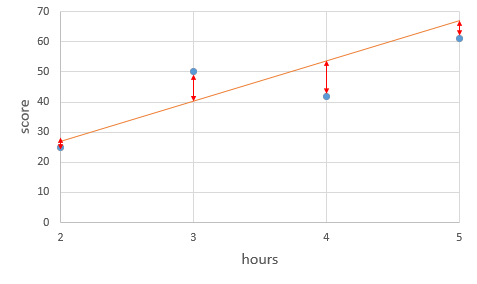

빨간색 화살표(실제 값 - 예측 값) = error

Mean Squared Error(MSE) : 오차의 제곱의 합 = cost(W, b)

###제곱의 합을 사용하는 이유

오차를 계산할 때 절댓값의 합 대신 제곱의 합을 사용하는 주된 이유는 여러 가지가 있다. 각각의 방법이 가지고 있는 수학적 성질과 그로 인한 장단점을 고려할 때, 제곱의 합이 선호되는 이유를 다음과 같이 정리할 수 있다.

1. **미분 가능성**:
   - 제곱 오차는 미분 가능하여, 경사 하강법과 같은 최적화 알고리즘을 적용할 수 있다. 절댓값 함수는 \( x=0 \)에서 미분 불가능하여, 최적화 과정에서 어려움이 발생할 수 있다.

2. **큰 오차에 대한 민감도**:
   - 제곱 오차는 큰 오차에 대해 더 민감하게 반응한다. 오차가 커질수록 제곱 오차는 급격히 증가하므로, 이는 모델이 큰 오차를 최소화하도록 유도한다. 절댓값 오차는 오차의 크기에 대해 선형적으로 반응하므로, 큰 오차와 작은 오차에 대한 차별성이 적다.

3. **수학적 편의성**:
   - 제곱 오차는 여러 수학적, 통계적 성질을 가지며, 이로 인해 여러 분석 방법과 쉽게 결합할 수 있다. 예를 들어, 최소 제곱법(least squares)은 선형 회귀 분석에서 매우 중요하며, 이는 제곱 오차를 최소화하는 방법이다.

4. **평균과 분산의 관계**:
   - 제곱 오차를 사용하면, 평균과 분산과 같은 통계적 개념과 직접적으로 연관지을 수 있다. 이는 데이터 분석과 해석에 있어 유리하다. 예를 들어, 제곱 오차의 평균은 분산과 관련이 있으며, 이는 데이터의 변동성을 평가하는 데 중요하다.

이러한 이유들로 인해 제곱 오차가 많은 경우에서 절댓값 오차보다 더 선호된다. 물론, 절댓값 오차가 더 적합한 상황도 존재한다. 특히, 이상치(outlier)에 덜 민감한 모델을 원할 때 절댓값 오차를 사용할 수 있다. 하지만, 일반적으로는 위의 이유들로 인해 제곱 오차가 더 많이 사용된다.

##4) Optimizer - Gradient Descent

Cost Function의 값을 최소로 하는 W와 b를 찾는 방법으로 사용되는 알고리즘

이 Optimizer 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 training이라고 부름

가장 기본적인 Optimizer algorithm을 Gradient Descent라고 함

b = 0 이라고 가정해보자.

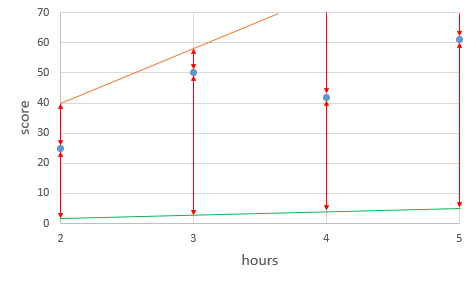

H(x) = Wx

cost(W) 함수를 나타내면 아래와 같음.

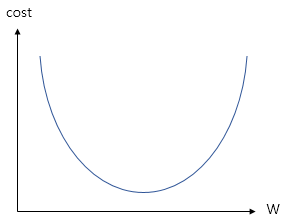

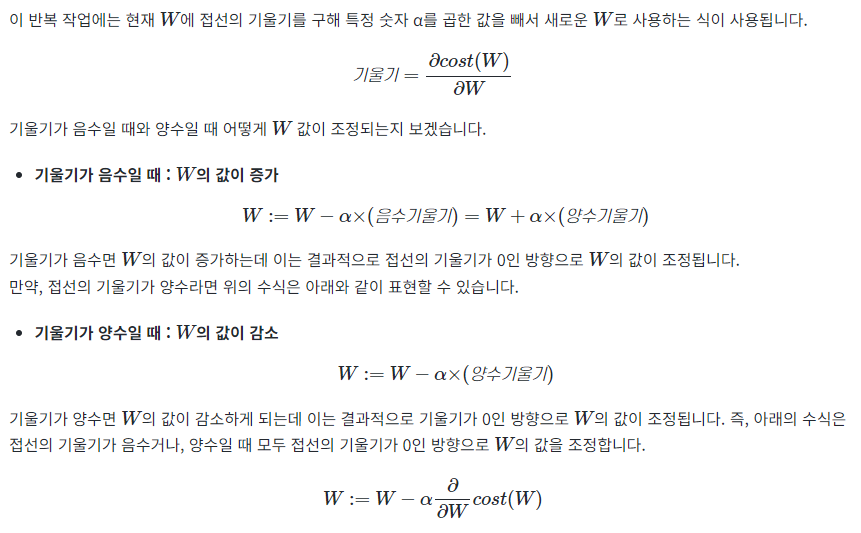

학습률 α는 W의 값을 변경할 때, 얼마나 크게 변경할지를 결정

가설, 비용함수, 옵티마이저는 머신러닝 분야에서 사용되는 포괄적인 개념임.

풀고자하는 각 문제에 따라 가설, 비용함수, 옵티마이저는 다를 수 있음.

##5) 파이토치로 선형 회귀 구현

(1) 기본 세팅

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에 같은 결과가 나오도록 랜덤 시드(random seed)
torch.manual_seed(1)

(2) 변수 선언

In [6]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [7]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [8]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


(3) 가중치와 편향의 초기화

In [9]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시(requires_grad=True)
W = torch.zeros(1, requires_grad = True)
# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [10]:
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


(4) 가설 세우기

H(x) = Wx + b

In [11]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


(5) 비용 함수 선언하기

파이토치 코드 상으로 선형회귀의 비용함수에 해당되는 평균제곱 오차 선언

In [12]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


(6) 경사 하강법 구현하기

SGD는 경사하강법의 일종

lr은 learning rate

In [13]:
optimizer = optim.SGD([W, b], lr=0.01)

In [14]:
#gradient를 0으로 초기화
optimizer.zero_grad()
#비용 함수를 미분하여 gradient 계산
cost.backward()
#W와 b를 업데이트
optimizer.step()

(7) 전체 코드

In [18]:
#데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

#모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01) # 참고로 lr이 없을 때는 학습 결과가 더 안 좋았음

nb_epochs = 2000 #원하는 만큼 경사 하강법을 반복
for epoch in range(nb_epochs +1):

  #H(x) 계산
  hypothesis = x_train * W + b

  #cost 계산
  cost = torch.mean((hypothesis - y_train) **2)

  #cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))

Epoch    0/2000 W: 0.187, b: 0.080 cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 cost: 0.000008

##6) optimizer.zero_grad()가 필요한 이유

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있음

In [19]:
import torch

w = torch.tensor(2.0, requires_grad = True)

nb_epochs = 20
for epoch in range(nb_epochs +1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


계속해서 미분값인 2가 누적되고 있음.

optimizer.zero_grad()로 미분값 초기화 해야함.

##7) torch.manual_seed()를 하는 이유

torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해주므로 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있음

In [ ]:
import torch

In [21]:
torch.manual_seed(3)
print('When random seed is 3')
for i in range(1, 3):
  print(torch.rand(1))

When random seed is 3
tensor([0.0043])
tensor([0.1056])


In [22]:
torch.manual_seed(5)
print('When random seed is 5')
for i in range(1, 3):
  print(torch.rand(1))

When random seed is 5
tensor([0.8303])
tensor([0.1261])


In [23]:
torch.manual_seed(3)
print('When random seed is 3 again')
for i in range(1, 3):
  print(torch.rand(1))

When random seed is 3 again
tensor([0.0043])
tensor([0.1056])


##8) Autograd 실습

2w^2+5라는 식을 세워보고 미분

In [24]:
import torch

값이 2인 임의의 스칼라 텐서 w 선언

required_grad =True 라는 것은 텐서에 대한 기울기를 저장하겠다는 의미

이렇게 하면 w.grad에 w에 대한 미분값이 저장됨

In [25]:
w = torch.tensor(2.0, requires_grad = True)

In [27]:
# 수식 정의
y = w**2
z = 2*y + 5

In [28]:
# 수식z를 w에 대해 미분. backward()를 호출하면 해당 수식의 w에 대한 기울기 계산.
z.backward()

In [31]:
# w.grad에 w가 속한 수식을 w로 미분한 값이 저장됨
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0
